In [55]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
file_in = "Fragaria_x_ananassa-Winter_Dawn_vs_fvesca_v1.1_pseudo.fna.LG1_50K.pileup"
file_clean = "Clean"
file_out = "Out_Realish3"
min_quality = 30

In [2]:
with open(file_in, 'r') as pileupIn, open(file_clean, 'w') as pileupClean:
    
    # This gets the first row for the while loop
    row = pileupIn.readline().split()
    while row:
        
        #Removes alignment scores from column 5
        row[4] = re.sub(r'(\$)|(\^.)', '', row[4])
        
        #Keeps only rows that do not contain +, - , *, > or < in column 5
        if re.search('.*[-+<>\*]\S*',row[4]) == None:
            pileupClean.write("\t".join(row)+"\n")
        
        # this gets the next row for the while loop to look at
        row = pileupIn.readline().split()
    

In [3]:
with open(file_clean, 'r') as pileupClean, open(file_out, 'w') as pileupOut:
    row = pileupClean.readline().split()
    while row:
        remaining_bases = []
        remaining_scores = []
        
        A_num = 0
        T_num = 0
        C_num = 0
        G_num = 0
        Total_num = 0
        
        for base, score in zip(row[4], row[5]):
            Numeric_Score = ord(score) - 33

            if Numeric_Score >= min_quality:
                remaining_bases.append(base)
                remaining_scores.append(score)
                
                if base == "g":
                    G_num += 1
                elif base == "G":
                    G_num += 1
                elif base == "c":
                    C_num += 1
                elif base == "C":
                    C_num += 1
                elif base == "a":
                    A_num += 1
                elif base == "A":
                    A_num += 1
                elif base == "t":
                    T_num += 1
                elif base == "T":
                    T_num += 1
                else:
                    pass
            Total_num += 1
                
        row[4] = "".join(remaining_bases)
        row[5] = "".join(remaining_scores)
        
        if Total_num >= 10:
            if G_num >= 3:
                new_row = "\t".join(row[0:3]) +  '\t' + "G"+ '\t' + str(G_num/Total_num) +"\n"
                pileupOut.write(new_row)
            if C_num >= 3:
                new_row = "\t".join(row[0:3]) +  '\t' + "C"+ '\t' + str(C_num/Total_num) +"\n"
                pileupOut.write(new_row)
            if A_num >= 3:
                new_row = "\t".join(row[0:3]) +  '\t' + "A"+ '\t' + str(A_num/Total_num) +"\n"
                pileupOut.write(new_row)          
            if T_num >= 3:
                new_row = "\t".join(row[0:3]) +  '\t' + "T"+ '\t' + str(T_num/Total_num) +"\n"
                pileupOut.write(new_row)
        row = pileupClean.readline().split()

In [67]:
df = pd.read_csv(file_out, sep="\t", header = None, names=['a','Position','c','d','e'])
df

,a,Position,c,d,e
0,LG1,312,G,C,0.857143
1,LG1,412,C,T,0.888889
2,LG1,442,C,G,0.846154
3,LG1,516,C,G,0.961538
4,LG1,791,T,C,0.891892
5,LG1,852,C,T,0.962963
6,LG1,909,C,T,0.121212
7,LG1,972,T,C,0.166667
8,LG1,1057,C,T,0.904762
9,LG1,1216,T,C,0.928571


<Container object of 2855 artists>

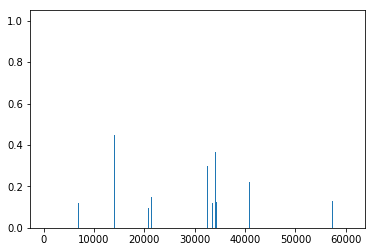

In [68]:
x = list(df['Position'])
height = list(df['e'])

plt.bar(x, height)

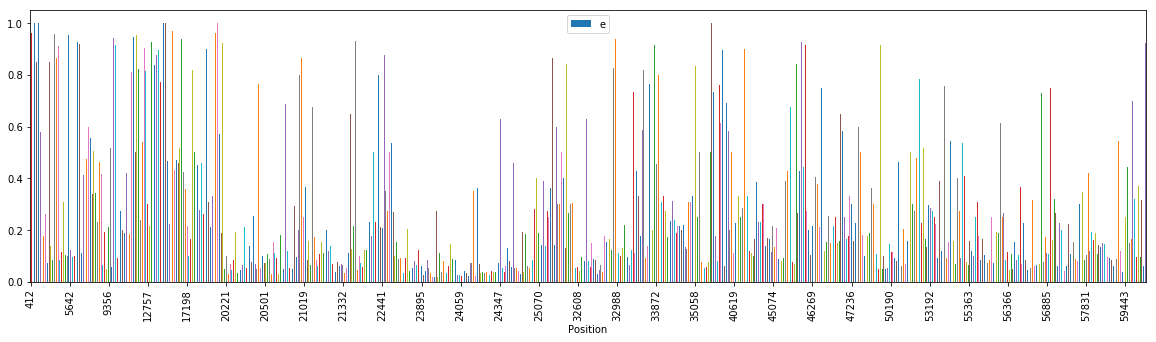

In [74]:
# plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

ax = df.plot(x='Position', y='e', kind='bar', figsize=(20,5),  )
xticks = list(range(1, len(df), 100))
ax.set_xticks(xticks)
ax.set_xticklabels(df.loc[xticks, 'Position'])

# plt.xticks(np.arange(min(x max(x)+1, 10000.0))
# ax.set_xticks(range(1,lenf)),minor=True)
plt.show()